In [29]:
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import cv2 

In [2]:
train = ImageDataGenerator(rescale = 1./255,
                   shear_range = 0.3,
                   horizontal_flip = True,
                   zoom_range = 0.3)
val = ImageDataGenerator(rescale = 1./255,
                   shear_range = 0.3,
                   horizontal_flip = True,
                   zoom_range = 0.3)
test = ImageDataGenerator(rescale=1/255)

In [3]:
train_dataset = train.flow_from_directory(r"D:\classes_ms\Big_Data\mini_proj\train", target_size = (200, 200), batch_size = 3,color_mode = 'rgb',
                                                   class_mode = 'categorical')
val_dataset = val.flow_from_directory(r"D:\classes_ms\Big_Data\mini_proj\val", target_size = (200, 200), batch_size = 3,color_mode = 'rgb',
                                                   class_mode = 'categorical')
test_dataset = test.flow_from_directory(r"D:\classes_ms\Big_Data\mini_proj\test", target_size = (200, 200), batch_size = 3, color_mode = 'rgb',
                                                   class_mode = 'categorical')

Found 48 images belonging to 3 classes.
Found 48 images belonging to 3 classes.
Found 25 images belonging to 3 classes.


In [4]:
from keras.models import Sequential
from keras.layers import *

model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu', input_shape = (200,200,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),activation = 'relu', input_shape = (200,200,3)))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3),activation = 'relu', input_shape = (200,200,3)))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 33856)             0

In [6]:
history = model.fit_generator(train_dataset, validation_data = val_dataset, epochs = 20)

Epoch 1/20
16/16 [==============================] - 15s 872ms/step - loss: 2.8081 - accuracy: 0.3082 - val_loss: 0.5756 - val_accuracy: 0.7500
Epoch 2/20
16/16 [==============================] - 13s 823ms/step - loss: 0.7937 - accuracy: 0.7462 - val_loss: 0.8872 - val_accuracy: 0.6250
Epoch 3/20
16/16 [==============================] - 13s 831ms/step - loss: 0.6898 - accuracy: 0.7353 - val_loss: 0.3784 - val_accuracy: 0.8958
Epoch 4/20
16/16 [==============================] - 13s 811ms/step - loss: 0.4549 - accuracy: 0.8024 - val_loss: 0.2203 - val_accuracy: 0.9375
Epoch 5/20
16/16 [==============================] - 13s 815ms/step - loss: 0.5295 - accuracy: 0.7809 - val_loss: 0.1358 - val_accuracy: 0.9375
Epoch 6/20
16/16 [==============================] - 13s 797ms/step - loss: 0.4802 - accuracy: 0.8691 - val_loss: 0.2311 - val_accuracy: 0.9167
Epoch 7/20
16/16 [==============================] - 13s 805ms/step - loss: 0.2541 - accuracy: 0.8760 - val_loss: 0.0956 - val_accuracy: 0.9583

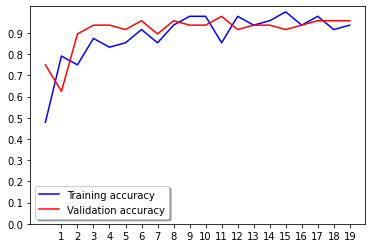

In [14]:
plt.figure()
plt.plot(history.history['accuracy'], color='b', label="Training accuracy")
plt.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
plt.yticks(np.arange(0, 1, 0.1))
plt.xticks(np.arange(1, 20,1))
plt.legend(loc='best')
plt.show()
plt.close()

In [34]:
loss, accuracy = model.evaluate(test_dataset)
accuracy

9/9 [==============================] - 1s 73ms/step - loss: 0.3272 - accuracy: 0.8800


0.8799999952316284

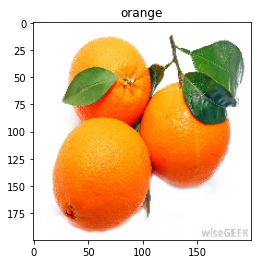

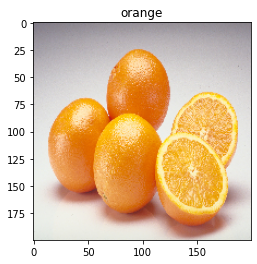

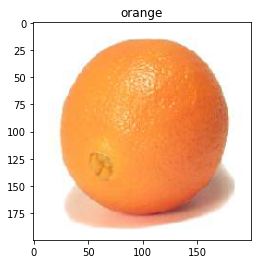

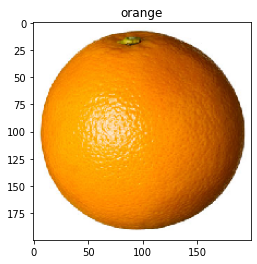

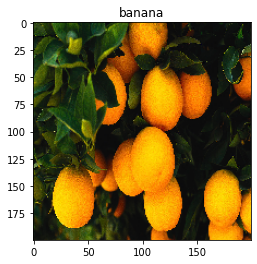

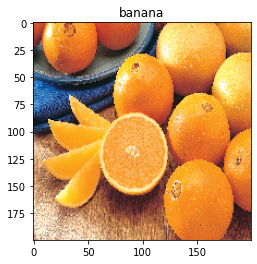

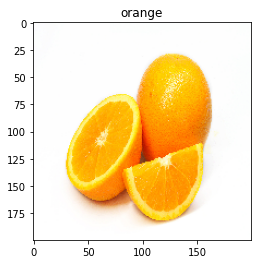

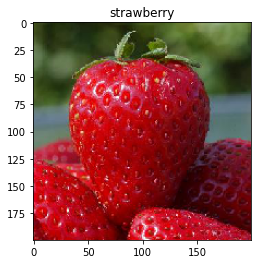

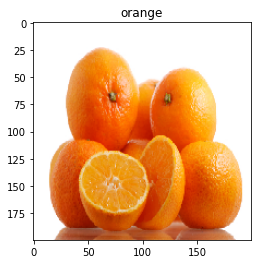

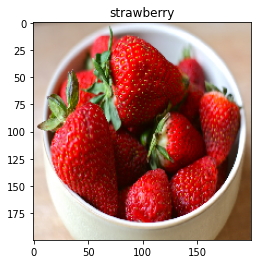

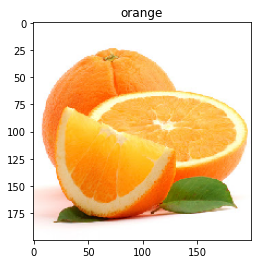

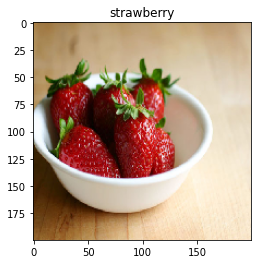

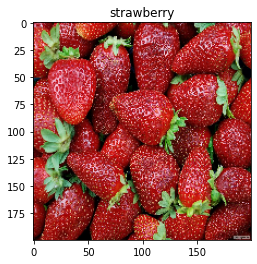

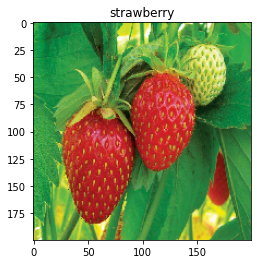

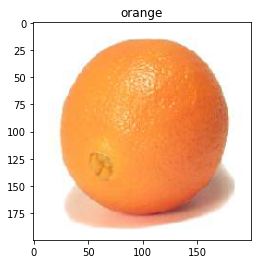

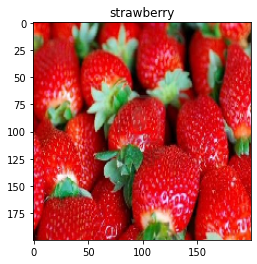

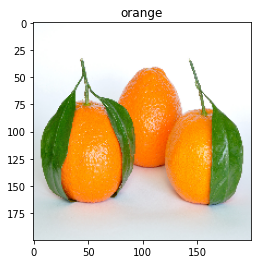

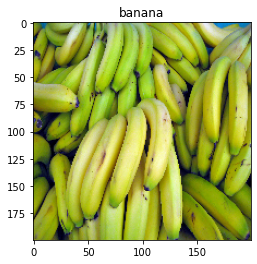

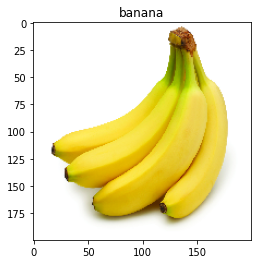

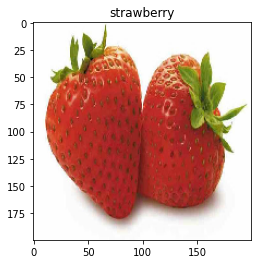

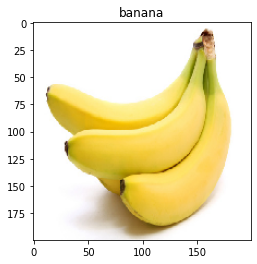

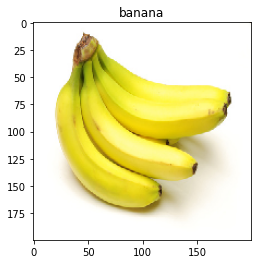

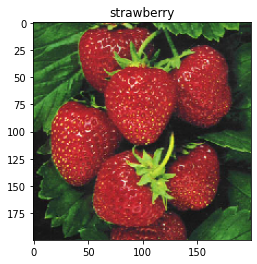

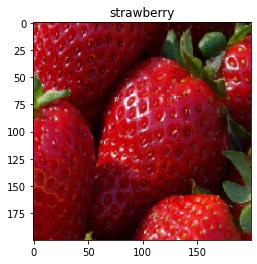

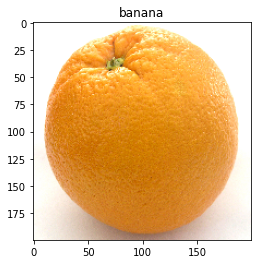

In [18]:
test_dir = r"D:\classes_ms\Big_Data\mini_proj\test_all"
import os
import matplotlib.pyplot as plt
import numpy as np
for i in os.listdir(test_dir):
    img = image.load_img(test_dir+'//'+i, target_size = (200,200))
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis=0)
    images = np.vstack([X])
    images /= 255.
    val = model.predict(images)
    temp = list(val[0])
    c = ['banana', 'orange','strawberry']
    label = temp.index(max(temp))
    plt.title(c[label])
    plt.imshow(img)
    plt.show()
    